<div align="center">
  <a href="https://colab.research.google.com/github/biplab37/Graphene/blob/main/solveode_mass.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" width='200'/>
  </a>
</div>

## Time evolution of the distribution function
---

Including mass term



### Import the packages

In [1]:
import numpy as np
import scipy.integrate as integrate
from scipy.integrate import solve_ivp

# For plotting
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['text.usetex'] = False

#### Function definitions

In [91]:
# System of Odes
def odes(t, x, p, E, A, m):
    E_field = E(t)
    vec_pot = A(t)

    def eps(p):
        return np.sqrt((p[0] - vec_pot[0])**2 + (p[1] - vec_pot[1])**2 + m**2) # mass term goes into the dispersion

    def lamb(p):
        return (E_field[0]*(p[1] - vec_pot[1])- E_field[1]*(p[0] - vec_pot[0]))/eps(p)**2

    dx = np.zeros(3)
    dx[0] = 0.5*lamb(p)*x[1]
    dx[1] = lamb(p)*(1.0 - 2.0*x[0]) - 2.0*eps(p)*x[2]
    dx[2] = 2.0*eps(p)*x[1]

    return dx

In [82]:
def exact_sol(E,A,t1,t2, m=0.1):
    # Define the function which calculates the value of the function at a given momentum
    # and return only the value at time t2.
    def fatp(p1, p2):
        t_span = (t1,t2)
        sol = solve_ivp(lambda t, x: odes(t, x, [p1, p2], E, A, m), t_span, x0,max_step=1000)
        return sol.y[0][-1]

    return fatp

In [86]:
def exact_sol_t(E,A,t1,t2, m=0.1, timesteps=200):
    ## Returns a function which takes px and py to return the time evolution of f, u and v
    def fatp_t(p1, p2):
        t_span = (t1,t2)
        sol = solve_ivp(lambda t, x: odes(t, x, [p1, p2], E, A, m), t_span, x0, rtol=1e-3,  t_eval=np.linspace(t1,t2,timesteps))
        return sol

    return fatp_t

In [84]:
def generate_data(f,pxrange,pyrange):
    X, Y = np.meshgrid(pxrange, pyrange)

    # Evaluate the function at each point
    fp = np.vectorize(f)
    Z = fp(X, Y)
    return X,Y,Z

def plot_data(X,Y,Z):
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(121,projection='3d')
    ax2 = fig.add_subplot(122)

    sp1 = ax1.plot_surface(X, Y, Z,cmap=cm.coolwarm)
    sp2 = ax2.contourf(X,Y,Z,color=cm.coolwarm)
    fig.colorbar(sp1)
    fig.colorbar(sp2)

    # Add labels and title
    ax1.set_xlabel(r'kx')
    ax1.set_ylabel(r'ky')
    ax1.set_zlabel('f(kx,ky)')
    ax1.set_title('Surface Plot of f(kx,ky)')

    ax2.set_xlabel('kx')
    ax2.set_ylabel('ky')
    ax2.set_title('Contour Plot of f(kx,ky)')

#### Define Variables and Initial Conditions

In [48]:
t1 = -5.0
t2 = 5.0

## initial conditions
x0 = np.array([0.0, 0.0, 0.0])

# Modify the values of external electric field $E(t)$ and vector potential $A(t)$ and rerun the cells below to see the difference in results.
>Note that the code might fail for highly oscillatory fields and it might take some time to run.

In [69]:
# define external fields
E0 = 0.8
def A(t):
    return [-E0*np.tanh(2*t)/2,0.0]
def E(t):
    return [E0/np.cosh(2*t)**2,0.0]

Text(0, 0.5, 'E(t)')

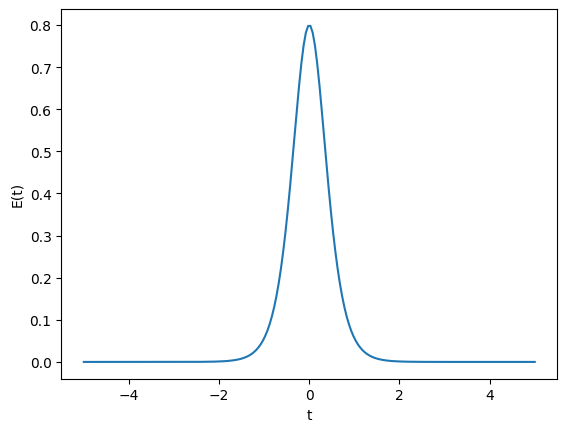

In [90]:
# plot the pulse

plt.plot(np.linspace(t1,t2,200),E(np.linspace(t1,t2,200))[0])
plt.xlabel('t')
plt.ylabel('E(t)')

<ipython-input-3-ee27a42ab5ac>:15: UserWarning: The following kwargs were not used by contour: 'color'
  sp2 = ax2.contourf(X,Y,Z,color=cm.coolwarm)


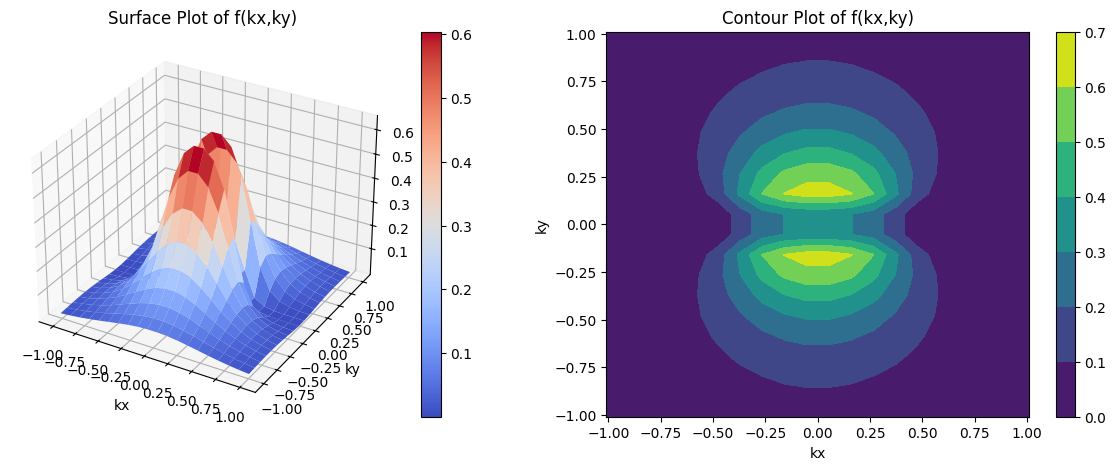

In [79]:
f = exact_sol(E,A,t1,t2)

range = np.linspace(-1.01,1.01,20)
plot_data(*generate_data(f,range,range))

Text(0, 0.5, 'f')

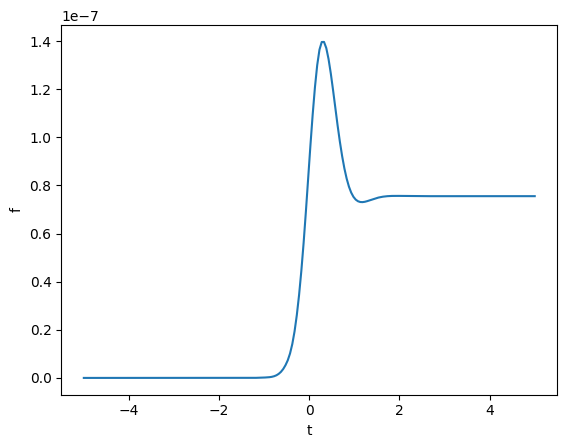

In [88]:
# slice perpendicular to the direction of the electric field
f1 = exact_sol_t(E,A,t1,t2, m=2.0) # play with this mass parameter
fsol = f1(0.01, 0.01) # We are interested in the limit px=py=0 but numerically it gives zero because of our equations. Put some small value insted

plt.plot(fsol.t, fsol.y[0]) # the first element if the distribution function
plt.xlabel('t')
plt.ylabel('f')
